In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "exo-det_type.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Selecting numeric features excluding 'mass' (target variable)
features = ["radius", "orbital_period", "semi_major_axis", "eccentricity",
            "inclination", "omega", "star_distance", "star_mass",
            "star_radius", "star_age", "star_teff"]

# Split dataset into known and unknown mass values
df_known = df.dropna(subset=['mass'])
df_unknown = df[df['mass'].isna()]

# Extract feature matrix and target vector
X_known = df_known[features]
y_known = df_known['mass']
X_unknown = df_unknown[features]

# Define a regression pipeline with missing value imputation and scaling
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Fill missing values with median
    ("scaler", StandardScaler()),  # Scale features
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict missing mass values
predicted_mass = pipeline.predict(X_unknown)
#predicted_mass = pd.DataFrame(predicted_mass, columns=['predicted_mass'])
#print(predicted_mass)
#plt.plot(predicted_mass['predicted_mass'],y_known)
#plt.show()
# Fill missing values in the original dataframe
df.loc[df['mass'].isna(), 'mass'] = predicted_mass

# Save updated dataset
#df.to_csv("exo-det_type_mass_filled.csv", index=False)
#print(df)
#plt.plot(df['mass'], df['radius'],'ro')
#print("Missing mass values filled and dataset saved as 'exo-det_type_filled.csv'.")


KeyError: "['eccentricity', 'inclination', 'omega', 'star_age'] not in index"

Linear Regression - Mean Absolute Error: 9.3532
Random Forest - Mean Absolute Error: 8.5235
Gradient Boosting - Mean Absolute Error: 8.0694

Best Model: Gradient Boosting with MAE = 8.0694


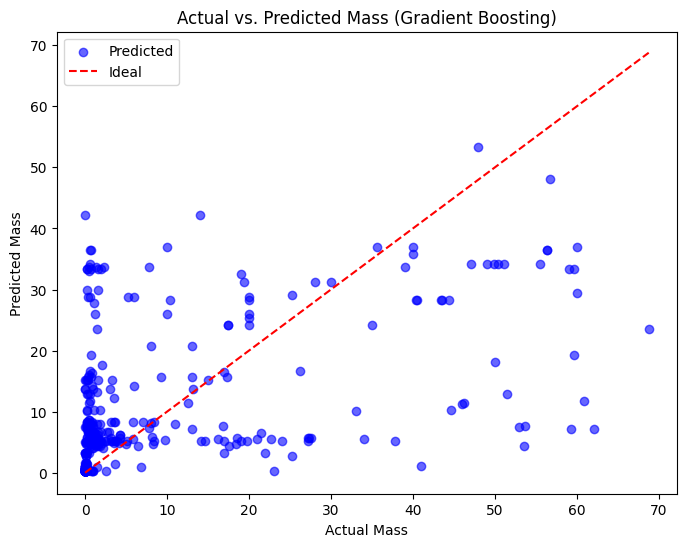

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load dataset
file_path = "exo-det_type.csv"
df = pd.read_csv(file_path)

df = df[["mass", "radius"]].copy()
df = df.dropna().copy()

# Select relevant features for regression
features = ["radius"]
target = "mass"

# Remove rows where target (mass) is NaN
df = df.dropna(subset=[target])

# Handle missing values in features by replacing with the mean
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(df[features])
y = df[target].values

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Train and evaluate models
errors = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    errors[name] = mae
    predictions[name] = y_pred
    print(f"{name} - Mean Absolute Error: {mae:.4f}")

# Find the best model (least error)
best_model = min(errors, key=errors.get)
print(f"\nBest Model: {best_model} with MAE = {errors[best_model]:.4f}")
# df[predicted_mass]
# Plot actual vs. predicted mass for the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions[best_model], alpha=0.6, color='blue', label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Ideal")
plt.xlabel("Actual Mass")
plt.ylabel("Predicted Mass")
plt.title(f"Actual vs. Predicted Mass ({best_model})")
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test, predictions[best_model], alpha=0.6, color='blue', label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Ideal")
plt.xlabel("Actual Mass")
plt.ylabel("Predicted Mass")
plt.title(f"Actual vs. Predicted Mass ({best_model})")
plt.legend()
plt.show()